# 1.load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# 2.load dataset

In [2]:
data_path = '../data/paper_data/PredictorData.csv'

In [3]:
df = pd.read_csv(data_path)
print(df.dtypes)
df.columns

yyyyq         float64
Index         float64
D3            float64
D12           float64
E3            float64
E12           float64
b/m           float64
tbl           float64
AAA           float64
BAA           float64
lty           float64
cay           float64
ntis          float64
Rfree         float64
infl          float64
ltr           float64
corpr         float64
svar          float64
csp           float64
ik            float64
CRSP_SPvw     float64
CRSP_SPvwx    float64
dtype: object


Index(['yyyyq', 'Index', 'D3', 'D12', 'E3', 'E12', 'b/m', 'tbl', 'AAA', 'BAA',
       'lty', 'cay', 'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp',
       'ik', 'CRSP_SPvw', 'CRSP_SPvwx'],
      dtype='object')

In [4]:

# Dividend–price ratio (log): log(D12) - log(index)
dpr = np.log(df.D12) - np.log(df.Index)
df = df.assign(dpr = lambda x: np.log(x.D12) - np.log(x.Index))


# Dividend yield (log): 

# Earnings–price ratio (log)

# Dividend–payout ratio (log)


# Stock variance: SVAR (column)
svar = df.svar

# Book-to-market ratio: b/m (column)
b2m = df.loc[:, 'b/m']
df = df.rename({'b/m': 'b2m'}, axis = 1)
# Net equity expansion: ntis (column)
ntis = df.ntis

# Treasury bill rate: tbl (column)
tbl = df.tbl

# Long-term yield, LTY:  lty (column)
lty = df.lty

# Long-term return, LTR: ltr (column)
ltr = df.ltr

# Term spread, TMS: lty (column) - tbl (column)
df = df.assign(tms = lambda x: x.lty - x.tbl)
tms = df.tms

# Default yield spread DFY: BAA (column) - AAA (column)
df = df.assign(dft = lambda x: x.BAA - x.AAA)
dft = df.dft

# Default return spread:  corpr (column) -  ltr (column)
df = df.assign(drs = lambda x: x.corpr - x.ltr)
drs = df.drs

# Inflation: infl (column)
infl = df.infl

# Investment-to-capital ratio: ik (column)
ik = df.ik


# 3. viz

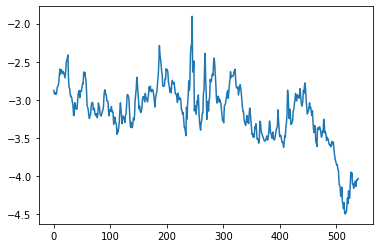

In [5]:
signal_lst = [dpr, svar, b2m, ntis, tbl, lty, ltr, tms, dft, drs, infl, ik]

plt.plot(dpr)

# 4. FFT

In [6]:
# select interested signal and dropna

selected = df.loc[:, ['yyyyq', 'Index', 'tms', 'dft']].dropna()
print(selected.shape)
selected

(344, 4)


,yyyyq,Index,tms,dft
196,19201.0,8.67,0.0034,0.0205
197,19202.0,7.92,-0.0021,0.0201
198,19203.0,7.87,-0.0038,0.0192
199,19204.0,6.81,-0.0048,0.0230
200,19211.0,6.88,-0.0011,0.0247
...,...,...,...,...
535,20044.0,1211.92,0.0265,0.0068
536,20051.0,1180.59,0.0214,0.0066
537,20052.0,1191.33,0.0132,0.0090
538,20053.0,1228.81,0.0122,0.0090


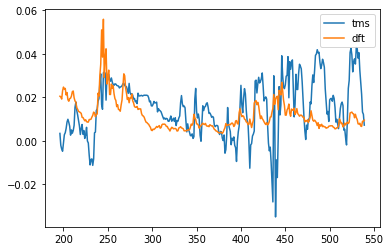

In [7]:
# define time space
t = selected.yyyyq.values
t_idx = np.arange(len(selected))

# choose signal
tms = selected.tms
dft = selected.dft
# dow = selected.Index

tms.plot()
dft.plot()
# dow.plot()

plt.legend()


### fft on the signal tms

In [8]:
# moving avg
N = len(selected)

# freq space
k = np.linspace(0, N - 1, N)

# time interval
T = t_idx[1] - t_idx[0]

# freq order space
k_order = np.linspace(-1/(2*T), 1/(2*T), N)


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


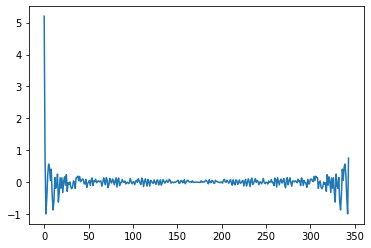

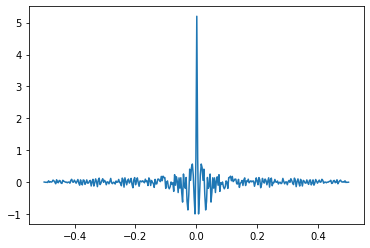

In [9]:
# fft
plt.figure()
tms_fft = np.fft.fft(selected.tms)
plt.plot(k, tms_fft)

# shifted fft
plt.figure()
tms_fftshift = np.fft.fftshift(tms_fft)
plt.plot(k_order, tms_fftshift)

### moving average

In [10]:
# build a average filter of length equal to a year; construct moving average filter (in time space)
quarter2year = 4
avg_filter = np.zeros(N)

avg_filter[: quarter2year] = 1 / quarter2year


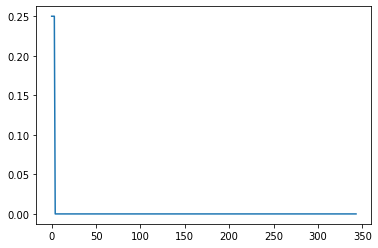

In [11]:
# transform moving average filter to freq space
avg_filter_fft = np.fft.fft(avg_filter)
avg_filter_fftshifted = np.fft.fftshift(avg_filter_fft)

plt.plot(avg_filter)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


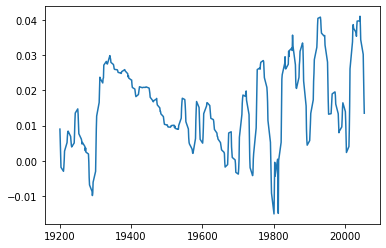

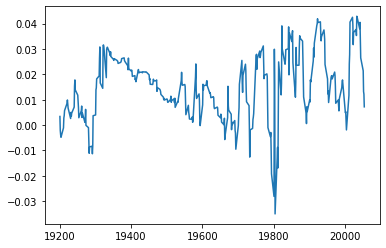

In [12]:
# apply the moving average filter to the signal in freq space
tms_avg_fft = tms_fft * avg_filter_fft

# convert the signal back to time space
tms_avg = np.fft.ifft(tms_avg_fft)

# view the signal after apply the moving average in time space
plt.figure()
plt.plot(t,tms_avg)

# view the original signal in time space
plt.figure()
plt.plot(t, tms)


In [13]:
# construct a low pass filter: https://en.wikipedia.org/wiki/Low-pass_filter
k0 = 50
low_pass_fft = np.ones(N)
low_pass_fft[k0 : N - k0] = 0

low_pass = np.fft.ifft(low_pass_fft)
# plt.plot(t, low_pass)

In [14]:
# construct a medium pass filter by specifying the lower and upper range you wanna preserve
# play around this range and see how the signal changes in the next cell
k_upper = N // 20
k_lower = 10

medium_pass_fft = np.zeros(N)
medium_pass_fft[k_lower : k_upper] = 1

medium_pass_fftshift = np.fft.fftshift(medium_pass_fft)
medium_pass = np.fft.ifft(medium_pass_fft)



/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


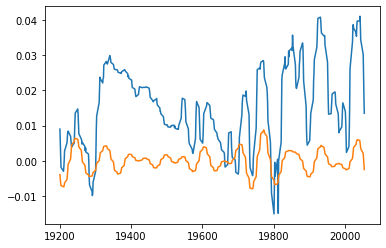

In [15]:
# apply low pass filter to the averaged signal
# play around the filter (use low-pass or medium pass filter) and see changes in the next cell
tms_avg_conv_fft = tms_avg_fft * medium_pass_fft


plt.plot(t, tms_avg)
plt.plot(t, np.fft.ifft(tms_avg_conv_fft))

In [16]:
# change to a different signal and view their fft components

# 5 regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


In [18]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_df = imp_mean.fit_transform(df)
# df.head(2)
imp_df = pd.DataFrame(imp_df, columns = df.columns)
imp_df = imp_df.loc[:, ['Index', 'dpr', 'svar', 'b2m', 'ntis', 'tbl', 'lty', 'ltr', 'tms', 'dft', 'drs', 'infl', 'ik']]


In [19]:
# # signal_lst[0].values

# m = 2
# M = len(imp_df)

# # m_0 = 2
# target = imp_df.Index
# input_ = signal_lst[0].values

# insample_df = imp_df.iloc[0 : m, :]
# shifted_insample_df = imp_df.iloc[1: m + 1, :]

# inputs = insample_df.dpr.values.reshape(-1, 1)
# target = shifted_insample_df.Index.values.reshape(-1, 1)

# lg = LinearRegression()
# lg.fit(inputs, target)
# plt.scatter(inputs, target)


# r_1 = lg.predict(inputs)
# plt.scatter(x = inputs, y = r_1, marker = '+')

    
# intercept_, coef_ = lg.intercept_, lg.coef_


In [20]:
def regression(intercept_, coef_, inputs):
    assert inputs.shape[0] == coef_.shape[0]
    
    out = intercept_  +  coef_ * inputs
    return out

def weighting(predictions):
    return np.mean(predictions)

In [21]:
imp_df

,Index,dpr,svar,b2m,ntis,tbl,lty,ltr,tms,dft,drs,infl,ik
0,4.610000,-2.875302,0.007235,0.604855,0.021306,0.037763,0.052823,0.014270,0.01512,0.011973,0.000961,0.008183,0.035812
1,4.820000,-2.919848,0.007235,0.604855,0.021306,0.037763,0.052823,0.014270,0.01512,0.011973,0.000961,0.008183,0.035812
2,4.840000,-2.923988,0.007235,0.604855,0.021306,0.037763,0.052823,0.014270,0.01512,0.011973,0.000961,0.008183,0.035812
3,4.740000,-2.903111,0.007235,0.604855,0.021306,0.037763,0.052823,0.014270,0.01512,0.011973,0.000961,0.008183,0.035812
4,5.040000,-2.926739,0.007235,0.604855,0.021306,0.037763,0.052823,0.014270,0.01512,0.011973,0.000961,0.008183,0.035812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1191.330000,-4.041833,0.003227,0.342483,0.007552,0.029700,0.042900,0.085945,0.01320,0.009000,-0.007790,0.006208,0.034748
538,1228.810000,-4.046912,0.002007,0.332964,0.006060,0.034200,0.046400,-0.030379,0.01220,0.009000,-0.002238,0.022108,0.034910
539,1248.290000,-4.028537,0.002791,0.328341,0.003736,0.038900,0.046100,0.014227,0.00720,0.009500,-0.002669,-0.010060,0.035011
540,136.023852,-3.156453,0.007235,0.604855,0.021306,0.037763,0.052823,0.014270,0.01512,0.011973,0.000961,0.008183,0.035812


In [29]:
signal_cols = ['dpr', 'svar', 'b2m', 'ntis', 'tbl', 'lty', 'ltr', 'tms', 'dft', 'drs', 'infl', 'ik']
M = len(imp_df)

selected_col = ['dpr']

sig_lst = []
for sig in signal_cols:
#     print(sig)
    r_lst = []
    
    m = 2
    while m < M:
        lg = LinearRegression()


        insample_df = imp_df.loc[: m + 1, [sig]]#.drop('Index', axis = 1)
        shifted_insample_df = imp_df.iloc[1 :m + 1, :]

        inputs = insample_df.iloc[: m, :].values#.reshape(-1, 1)
        target = shifted_insample_df.Index.values.reshape(-1, 1)

        lg.fit(inputs, target)

        x_m = inputs[[-1], :]
        r_m1 = regression(lg.intercept_, lg.coef_, x_m)

        r_lst.append(r_m1[0][0])


        m += 1
    sig_lst.append(r_lst)

sig_lst = np.array(sig_lst)
sig_lst.shape

(12, 540)

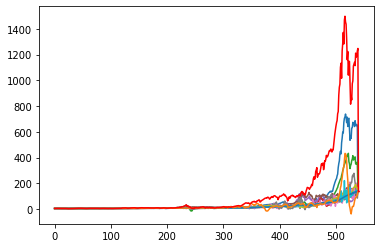

In [30]:
for i in sig_lst:
    plt.plot(i)
plt.plot(imp_df.Index, color = 'red')
# plt.plot(df.Index)

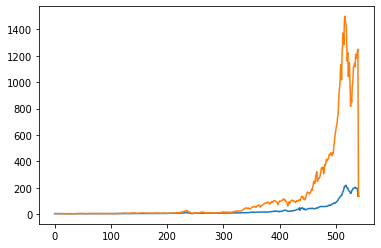

In [31]:
plt.plot(np.mean(sig_lst, axis = 0))
plt.plot(imp_df.Index)